In [1]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib.image import imread
from flowlib import read_flow

In [45]:
def warp(first_frame_name, second_frame_name, flow_name, out_dir, method):
    """
    Warps first_frame to get second frame using tensorflow image.dense_image_warp() or my_image_warp()
    """
    
    first_frame = imread( first_frame_name)
    second_frame = imread(second_frame_name)
    print("Shape of first frame: ", first_frame.shape)
    print("Shape of second frame: ", second_frame.shape)
    
    # read flow file saved in Middelbury .flo format
    flow = read_flow(flow_name)

    # make them 4D tensors to pass to a tensorflow graph
    first_frame_ex = np.expand_dims(first_frame, 0)
    second_frame_ex = np.expand_dims(second_frame, 0)
    flow_ex = np.expand_dims(flow, 0)
    print("Shape of first frame after expansion: ", first_frame_ex.shape)
    print("Shape of second frame after expansion: ", second_frame_ex.shape)

    # build the graph
    image_placeholder = tf.placeholder(shape=first_frame_ex.shape, dtype=tf.float32)
    flow_placeholder = tf.placeholder(shape=flow_ex.shape, dtype=tf.float64)
    if method == 'tensorflow':
        warped_tensor = tf.contrib.image.dense_image_warp(image_placeholder, flow_placeholder)
    elif method == 'mdified_tensorflow':
        warped_tensor = modified_image_warp(image_placeholder, flow_placeholder)

    # run the graph and get results
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        feed_dict = {image_placeholder: second_frame_ex, flow_placeholder: flow_ex}
        warped_image = sess.run(warped_tensor, feed_dict=feed_dict)
        warped_image = warped_image[0]  # we have just one  output
        print("Shape of warped_image: ", warped_image.shape)
        
    # save warped image
    plt.imsave(os.path.join(out_dir, 'frame_0010_warped.png'), warped_image)

    # absolute difference between second image and warped one
    second_minus_warped = np.abs(second_frame - warped_image)
    plt.imsave(os.path.join(out_dir, 'second_minus_warped.png'), second_minus_warped)
    
    # absolute difference between first image and warped one
    first_minus_warped = np.abs(first_frame -  warped_image)
    plt.imsave(os.path.join(out_dir, 'first_minus_warped.png'), first_minus_warped)
    
    # absolute difference between first image and second imaage
    first_minus_second = np.abs(first_frame -  second_frame)
    plt.imsave(os.path.join(out_dir, 'first_minus_second.png'), first_minus_second)
    

    # plot the result
    fig = plt.figure(figsize=(20, 20))
    plt.subplot(231)
    plt.imshow(first_frame)
    plt.title("First image")

    plt.subplot(232)
    plt.imshow(second_frame)
    plt.title("Second image")

    plt.subplot(233)
    plt.imshow(warped_image)
    plt.title("Warped image")

    plt.subplot(234)
    plt.imshow(first_minus_second)
    plt.title("first minus second")
    
    plt.subplot(235)
    plt.imshow(first_minus_warped)
    plt.title("first minus warped")
    
    plt.subplot(236)
    plt.imshow(second_minus_warped)
    plt.title("second minus warped")
    # get rid of Tick labels
    plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])
    plt.tight_layout()
    plt.show()

('Shape of first frame: ', (480, 640, 3))
('Shape of second frame: ', (480, 640, 3))
Reading 480 x 640 flo file
('Shape of first frame after expansion: ', (1, 480, 640, 3))
('Shape of second frame after expansion: ', (1, 480, 640, 3))
('Shape of warped_image: ', (480, 640, 3))


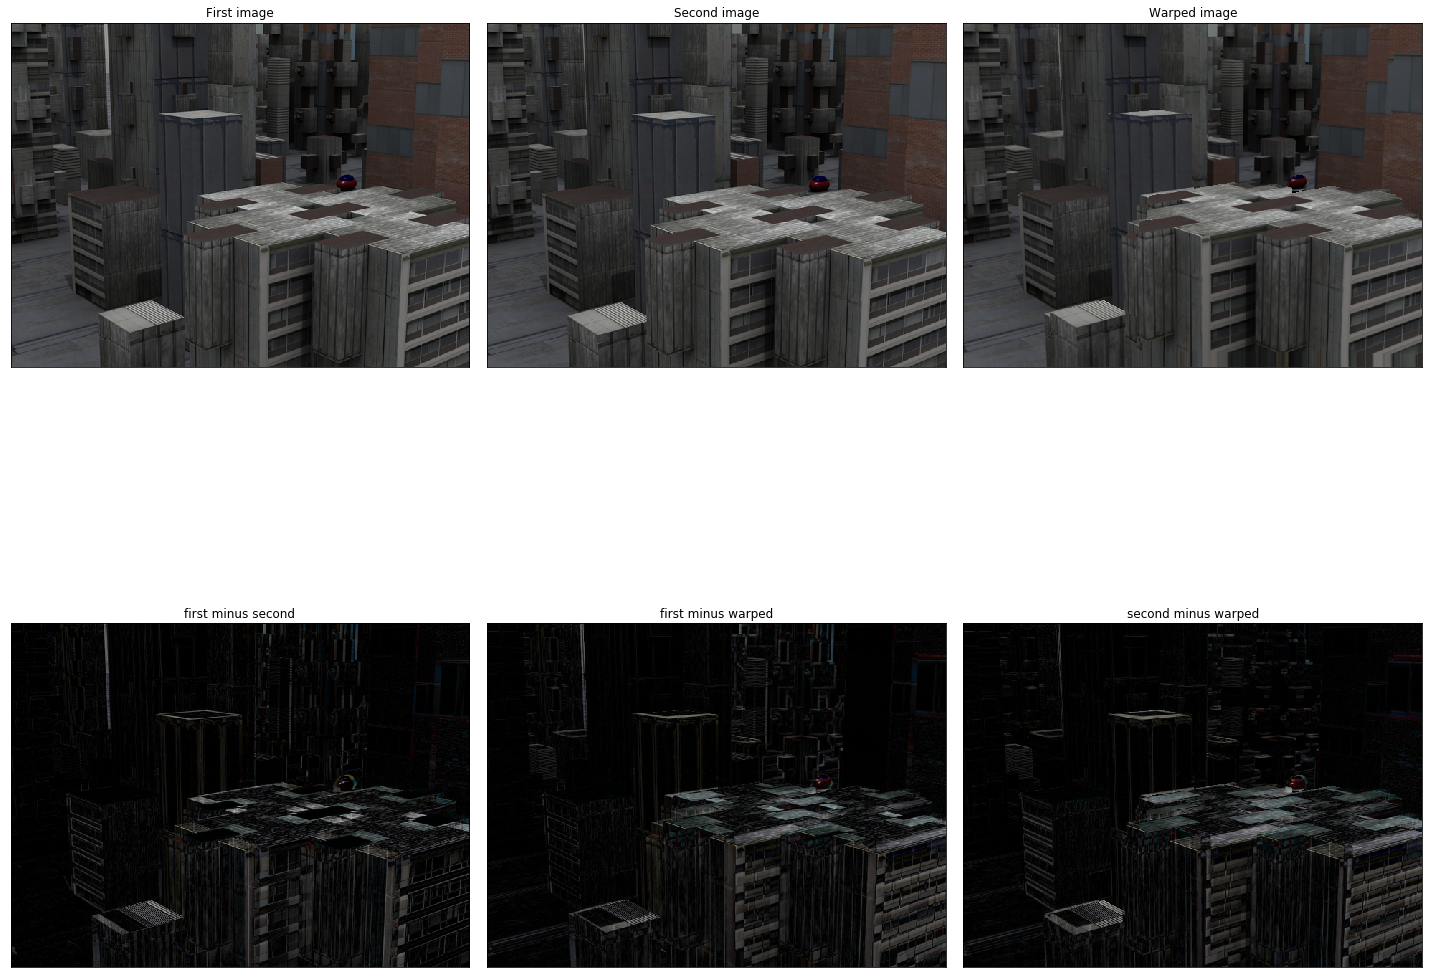

In [46]:
# Test on middlebury example
input_dir = './data/middlebury-Urban2/'
out_dir = input_dir
first_frame_name = os.path.join(input_dir, 'frame_0010.png')
second_frame_name = os.path.join(input_dir, 'frame_0011.png')
flow_name = os.path.join(input_dir, 'frame_0010.flo')
method = 'tensorflow'

warp(first_frame_name, second_frame_name, flow_name, out_dir, method)